# GUÍA PASO A PASO DE PCA
http://www.ub.edu/stat/docencia/Mates/ejemploACP.PDF

In [24]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# PCA RECURSOS HUMANOS

1. Abrir el archivo
2. Separar las variables dependientes de las independientes (RECURSOS HUMANOS) y normalizarlas
3. Construcción de las matrices de varianza y covarianza
4. Cálculo de los valores propios

In [25]:
#Se importan las librerias necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

1.Abrir el archivo

In [26]:
#Se cargan los archivos limpios sin variables repetidas, imputados los datos y sin atípicos

#SIEMPRE USAR EL ARCHIVO TOTALULIMPIO2 QUE ES EL DE LOS DATOS LIMPIOS

total=pd.read_excel("TOTALULIMPIO2-2016.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
10471,140767,5,1410,2016,1.665038,14.000000,5.370346,12.562613,2.2875,14.0,...,14400.0,223374,223374,800.000000,79.846659,209107,3.252153e+06,5.155038e+06,4.996960e+06,223374
10474,140807,5,1410,2016,1.665038,16.000000,5.370346,12.562613,2.2875,15.0,...,46396.0,289190,289190,343423.189677,79.846659,246552,2.147500e+04,5.155038e+06,4.996960e+06,289190
10475,140808,5,1410,2016,1.665038,28.000000,1.000000,1.000000,2.2875,27.0,...,46429.0,656973,656973,39787.000000,79.846659,626118,1.553240e+05,5.155038e+06,4.996960e+06,657023
10476,140809,5,1410,2016,1.665038,1.000000,5.370346,12.562613,2.2875,18.0,...,24497.0,516359,516359,24497.000000,36.000000,439511,6.641000e+04,5.155038e+06,4.996960e+06,516359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459,8,1410,2016,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356,1290356,11182.000000,54.000000,790408,6.182680e+05,5.155038e+06,4.996960e+06,1100444
11636,987465,8,1410,2016,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414,3679414,343423.189677,8.000000,1476328,2.164604e+06,5.155038e+06,4.996960e+06,3300208
11637,987467,8,1410,2016,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225,15550083,503083.000000,400.000000,7454626,6.940062e+06,5.155038e+06,1.608454e+06,15443532
11638,987483,8,1410,2016,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882,1284882,343423.189677,18.000000,835716,4.216890e+05,5.155038e+06,1.717450e+05,1180126


2.Separar las variables dependientes de las independientes (RECURSOS HUMANOS) y normalizarlas

In [27]:
variables = ['SOCIOS','PERMANENTE','APRENDIZ','PROD_NAL','PROD_EXT','OBRERO','ADM','TOTPERSONAL','TEMPORALDIRECTO','VENTAS']
# Separando los Recursos humanos (Varibles independientes)
X=total.loc[:,variables].values 
# Separando el objetivo que es ventas (Variable dependiente)
y=total.loc [:, ['VENTAS']].values 

In [28]:
x_std= StandardScaler().fit_transform(X)

In [29]:
recursosh = pd.DataFrame(data = X, columns = variables).head(823)
recursosh

,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,ADM,TOTPERSONAL,TEMPORALDIRECTO,VENTAS
0,1.665038,14.000000,5.370346,12.562613,2.2875,14.0,19.714668,14.0,79.846659,223374.0
1,1.665038,16.000000,5.370346,12.562613,2.2875,15.0,1.000000,16.0,79.846659,289190.0
2,1.665038,28.000000,1.000000,1.000000,2.2875,27.0,1.000000,29.0,79.846659,657023.0
3,1.665038,1.000000,5.370346,12.562613,2.2875,18.0,2.000000,20.0,36.000000,516359.0
...,...,...,...,...,...,...,...,...,...,...
819,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,19.000000,46.0,54.000000,1100444.0
820,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,17.000000,46.0,8.000000,3300208.0
821,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,34.000000,303.0,400.000000,15443532.0
822,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,10.000000,21.0,18.000000,1180126.0


In [30]:
#No hay datos perdidos pues se esta utilizando el archivo de los datos limpios

recursosh.isnull().sum() # Saber si hay casos con NA
recursosh.dropna(how="all", inplace=True) # Eliminar las observaciones con NA
recursosh.columns

Index(['SOCIOS', 'PERMANENTE', 'APRENDIZ', 'PROD_NAL', 'PROD_EXT', 'OBRERO',
       'ADM', 'TOTPERSONAL', 'TEMPORALDIRECTO', 'VENTAS'],
      dtype='object')

In [31]:
x=recursosh.drop("VENTAS",axis = 1) #Se elimina la variable ventas pues X=Recursos Humanos
y=recursosh["VENTAS"]  #Y=Ventas
names=recursosh.columns
X_std= StandardScaler().fit_transform(x)

<Figure size 432x288 with 0 Axes>

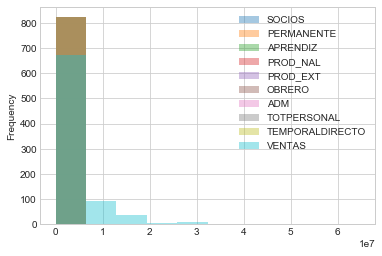

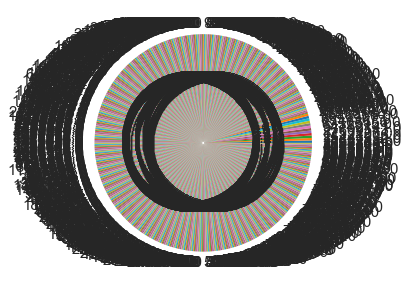

In [32]:
plt.figure("Histograma")
recursosh.plot.hist(alpha=0.4)
plt.figure("Gráfico de pie",figsize=(5,5))
recursosh.VENTAS.value_counts().plot(kind="pie",autopct='%1.1f%%', fontsize=15)
plt.show()

3.Construcción de las matrices de varianza y covarianza 

Para que se pueda realizar el PCA, es necesario que las variables presenten factores comunes. Es decir, que estén muy correlacionadas entre sí. Los coeficientes de la matriz de correlaciones deben ser grandes en valor absoluto. 

SI NO FUNCIONAN LAS DOS OPCIONES ANTERIORES INTENTAR POR FAVOR DESCARGAR Y EJECUTAR factor_analyzer DESDE ESTE ENLACE https://anaconda.org/desilinguist/factor_analyzer/files


0,90 > KMO Muy bueno

0,90 > KMO > 0,80 Bueno

0,80 > KMO > 0,70 Aceptable

0,70 > KMO > 0,60 Mediocre o regular

0,60 > KMO > 0,50 Malo

0,50 > KMO Inaceptable o muy malo3

In [33]:
# Matriz de covarianza

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

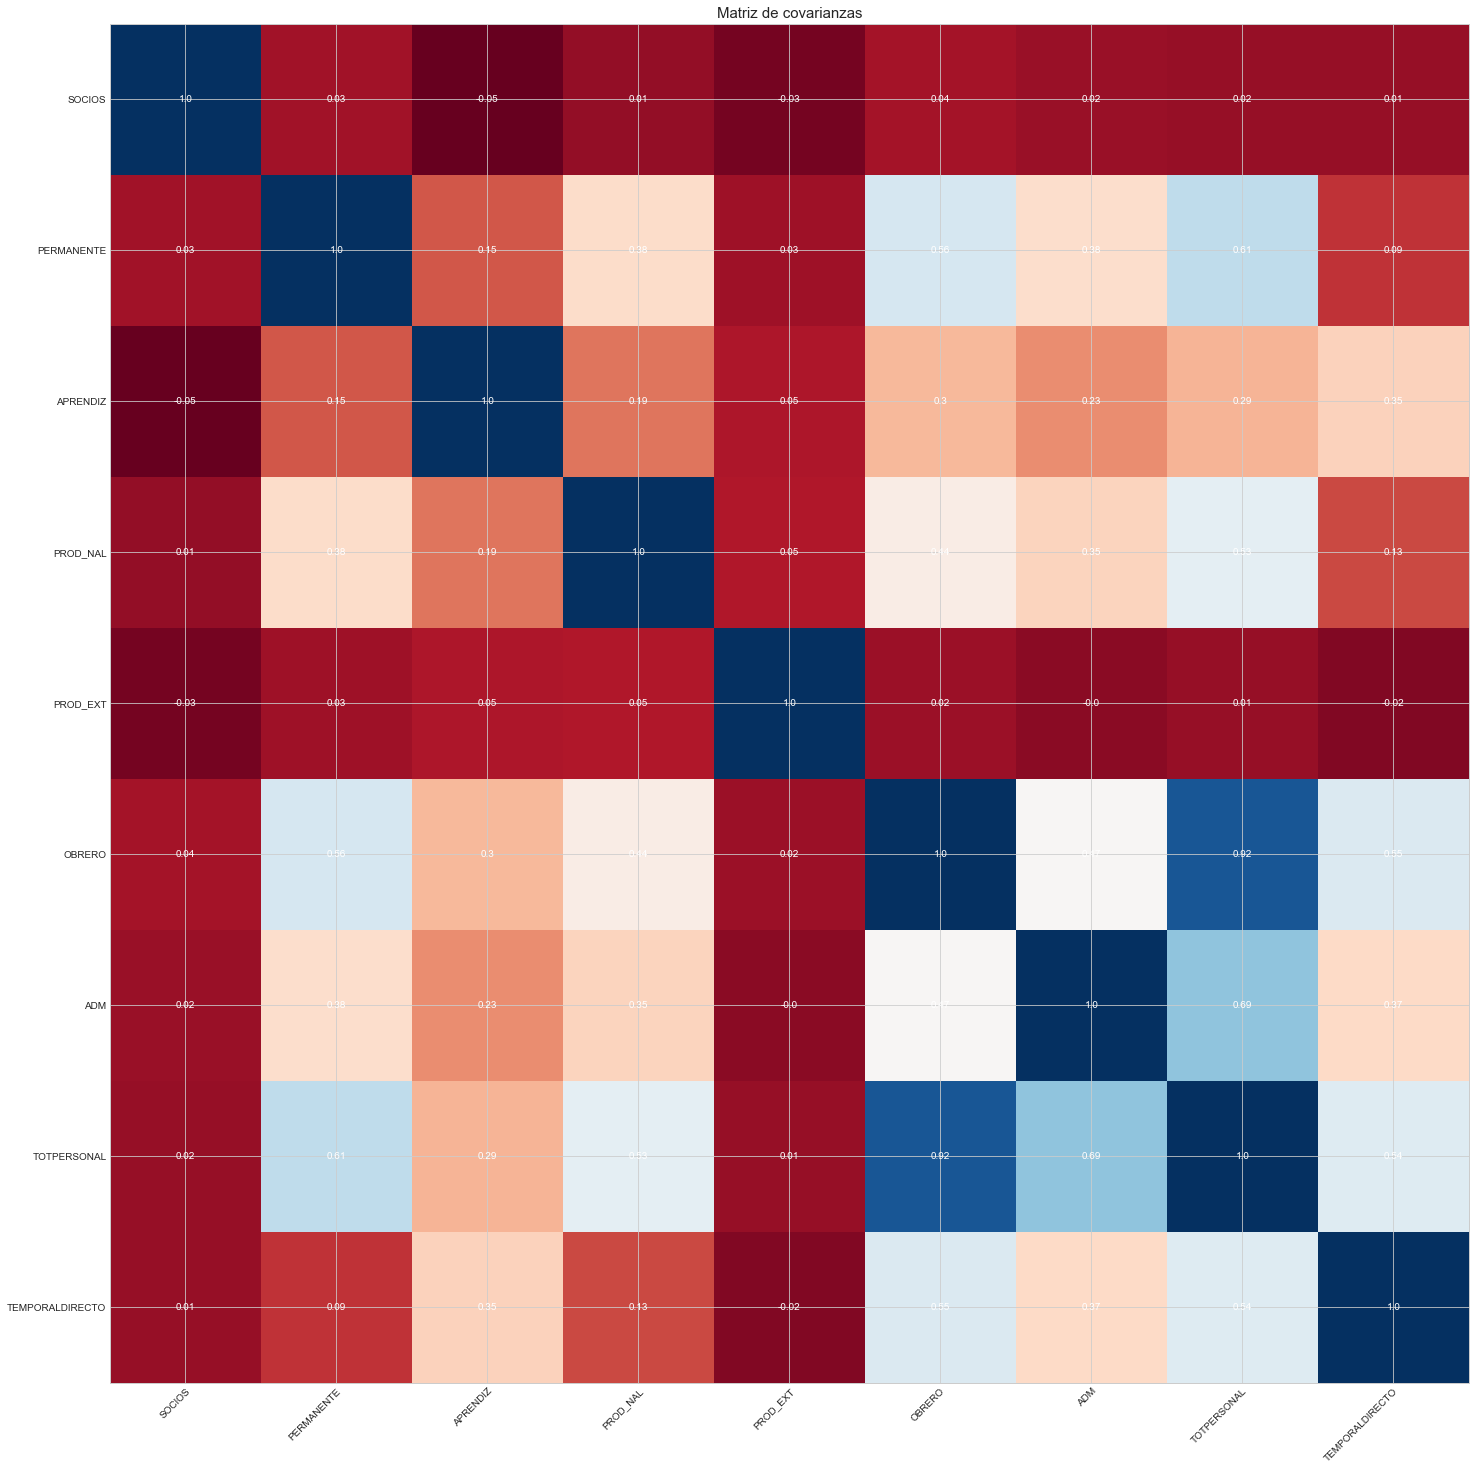

In [34]:
import matplotlib.pyplot as plt
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots(figsize=(25,25)) #Figsize para aumentar el tamaño
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))
# Asignar los nombres a las etiquetas
ax.set_xticklabels(names[:9])
ax.set_yticklabels(names[:9])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) 
# o de correlación si los datos están normalizados
plt.show()

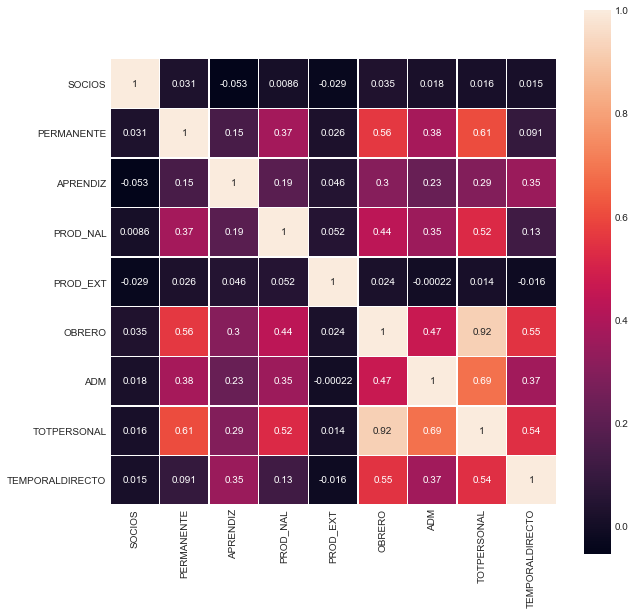

In [35]:
#Otra forma de visualizar la Matriz de covarianzas #ESTA ES MÁS BONITA
plt.subplots(figsize=(10,10))
sns.heatmap(x.corr(), square=True, annot=True, linewidths =0.4)

4.Cálculo de los valores propios

In [36]:
#KAREN da el mismo resultado utilizando CorMat o utilizando x.corr
eigen_value, eigen_vector =np.linalg.eig(x.corr()) 


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_value[i]), eigen_vector[:,i]) for i in range(len(eigen_value))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Valores propios ordenados:')
for i in eig_pairs:
    print(i[0])

Valores propios ordenados:
3.593099112262716
1.1130438429375318
1.048833401206505
0.9596969072878822
0.7578819042906162
0.6338922703214653
0.5788803324154299
0.28117098972962823
0.03350123954822847


In [37]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_value[i]), eigen_vector[i]) for i in range(len(eigen_value))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

print('Valores propios ordenados con su vector propio:')
eig_pairs

Valores propios ordenados con su vector propio:


[(3.593099112262716,
  array([-0.01422258,  0.01578266, -0.01100538,  0.33289933, -0.57857477,
          0.72212034, -0.1766881 ,  0.03418785, -0.00339053])),
 (1.1130438429375318,
  array([-0.31712655, -0.06371365,  0.19824618,  0.31935463,  0.19538832,
         -0.08853268, -0.45597884, -0.38700673, -0.5919264 ])),
 (1.048833401206505,
  array([-0.01893079,  0.00681462,  0.00863042,  0.02949357,  0.74229183,
          0.63235812,  0.21658981,  0.02860454, -0.00689376])),
 (0.9596969072878822,
  array([-0.47204036, -0.58038308, -0.50344192,  0.00234188, -0.04672201,
          0.01436917,  0.16551764, -0.33037795,  0.21894982])),
 (0.7578819042906162,
  array([-0.37927967, -0.23547662,  0.00680741,  0.02885973, -0.05188282,
         -0.0510151 ,  0.18194637,  0.77150552, -0.40767494])),
 (0.6338922703214653,
  array([-0.31859275, -0.01017263,  0.57620012, -0.54963999, -0.22099961,
          0.1697264 ,  0.31938208, -0.27434781, -0.09677276])),
 (0.5788803324154299,
  array([-0.50635138

In [38]:
Tot = sum(eigen_value)
var_exp = [(i / 9)*100 for i in sorted(eigen_value, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Varianza ordenada:')
var_exp
#Varianza ordenada

Varianza ordenada:


[39.92332346958574,
 12.367153810417019,
 11.653704457850056,
 10.663298969865357,
 8.420910047673512,
 7.043247448016282,
 6.432003693504777,
 3.12412210810698,
 0.37223599498031634]

In [39]:
print('Varianza acumulada:')
cum_var_exp

Varianza acumulada:


array([ 39.92332347,  52.29047728,  63.94418174,  74.60748071,
        83.02839076,  90.0716382 ,  96.5036419 ,  99.62776401,
       100.        ])

Gráfico de la varianza asociada a cada factor. Se utiliza para determinar cuántos factores deben retenerse. Típicamente el gráfico muestra la clara ruptura entre la pronunciada pendiente de los factores más importantes. 

http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/AMult/tema3am.pdf

PARA ESTA GRÁFICA LOS VALORES PROPIOS DEBEN ESTAR ORDENADOS DE MAYOR A MENOR O DE MAYOR A MENOR VARIANZA EXPLICADA

Realizando la gráfica con los valores propios ordenados de mayor a menor se obtiene:

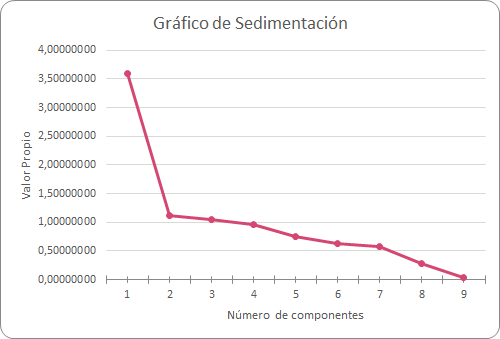

Analizando la gráfica Valor propio vs Número de componentes se muestra una clara ruptura en la segunda componente sin embargo los dos primeros componentes sólo explican el 46,9% de la información por lo que se deciden tomar las primeras 5 componentes cuya varianza acumulada es del 80,02%

En el caso de Python se toman las componentes 1, 7, 8, 9 Y 6

5.Proyección de los datos

In [40]:
M_w=eigen_vector[:,0:5]
Y=X_std.dot(M_w) # Nuevos Y

# PCA

In [41]:
from sklearn.decomposition import PCA

sklearn_PCA= PCA(n_components=5)
Y_1=sklearn_PCA.fit_transform(X_std)

In [42]:
PCArecursosh = pd.DataFrame(data = Y_1, columns = ['COMPONENTE_1_RH', 'COMPONENTE_2_RH','COMPONENTE_3_RH', 'COMPONENTE_4_RH','COMPONENTE_5_RH'])
PCArecursosh.head(823)

,COMPONENTE_1_RH,COMPONENTE_2_RH,COMPONENTE_3_RH,COMPONENTE_4_RH,COMPONENTE_5_RH
0,-0.329771,0.486558,-0.014264,-0.268016,0.516717
1,-0.659350,0.487409,-0.069871,-0.309518,0.692220
2,-1.193209,-0.293845,0.372877,-0.108053,-1.369155
3,-0.982352,0.246274,-0.189013,-0.232983,0.882481
...,...,...,...,...,...
819,-0.010201,-1.133287,0.527799,-0.661285,0.036985
820,-0.477593,-1.383988,-0.201747,0.268704,-0.207686
821,7.213544,4.766592,1.374600,-1.449926,-1.055804
822,-1.341945,-0.075747,-1.308755,1.572957,-0.514485


In [43]:
establecimiento=total[['VENTAS']].head(823)
establecimiento

,VENTAS
10471,223374
10474,289190
10475,657023
10476,516359
...,...
11635,1100444
11636,3300208
11637,15443532
11638,1180126


In [44]:
PCArecursosh.reset_index(drop=True, inplace=True) 
establecimiento.reset_index(drop=True, inplace=True) 
PCA = pd.concat([establecimiento,PCArecursosh], axis=1)
PCA

,VENTAS,COMPONENTE_1_RH,COMPONENTE_2_RH,COMPONENTE_3_RH,COMPONENTE_4_RH,COMPONENTE_5_RH
0,223374,-0.329771,0.486558,-0.014264,-0.268016,0.516717
1,289190,-0.659350,0.487409,-0.069871,-0.309518,0.692220
2,657023,-1.193209,-0.293845,0.372877,-0.108053,-1.369155
3,516359,-0.982352,0.246274,-0.189013,-0.232983,0.882481
...,...,...,...,...,...,...
819,1100444,-0.010201,-1.133287,0.527799,-0.661285,0.036985
820,3300208,-0.477593,-1.383988,-0.201747,0.268704,-0.207686
821,15443532,7.213544,4.766592,1.374600,-1.449926,-1.055804
822,1180126,-1.341945,-0.075747,-1.308755,1.572957,-0.514485


C:\Users\Invitado\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


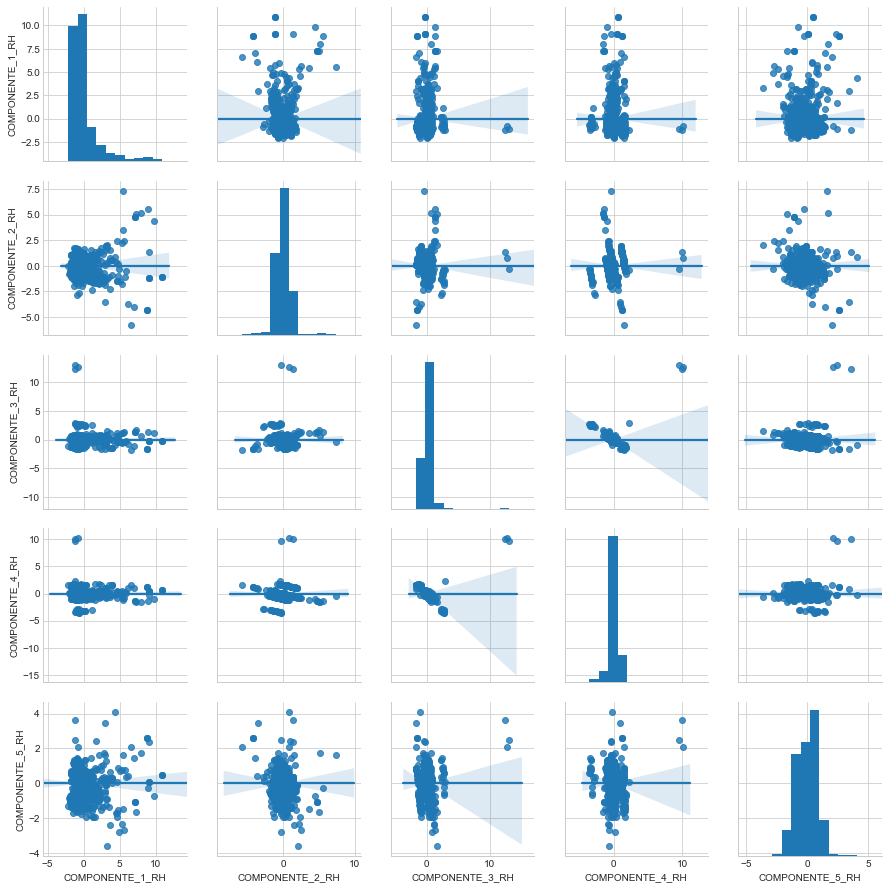

In [45]:
b = sns.pairplot(PCA, vars=["COMPONENTE_1_RH","COMPONENTE_2_RH","COMPONENTE_3_RH","COMPONENTE_4_RH","COMPONENTE_5_RH"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables

In [46]:
print(sklearn_PCA.explained_variance_ratio_) 

[0.39923323 0.12367154 0.11653704 0.10663299 0.0842091 ]


In [24]:
# Para guardar el Dataframe se utiliza la función to_excel y se especifíca el nombre del archivo

PCA.to_excel("PCA_RecursosHumanos.xlsx")